In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from time import sleep
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer

### 1.1

#### 1.1.3

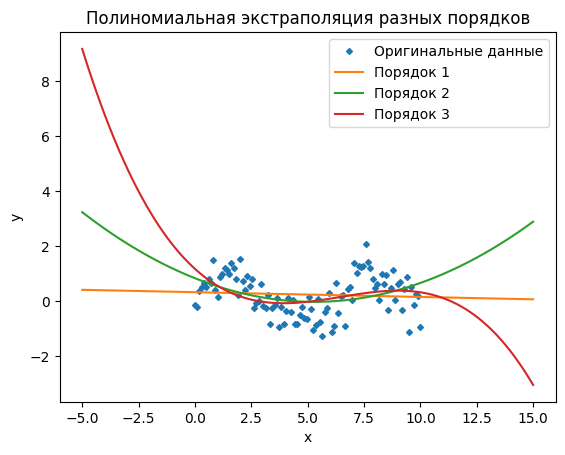

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.5 * np.random.randn(100)

degrees = [1, 2, 3]

fig, ax = plt.subplots()

ax.plot(x, y, marker='D', markersize=3, linestyle='None', label='Оригинальные данные')

for degree in degrees:
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    x_ext = np.linspace(-5, 15, 100)
    y_ext = poly(x_ext)
    ax.plot(x_ext, y_ext, label=f'Порядок {degree}')

# Set the title and labels
ax.set_title('Полиномиальная экстраполяция разных порядков')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# Show the plot
plt.show()

#### 1.1.5

In [35]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = np.linspace(0.1, 10, 100)

y1 = 2 + 3 * x
y2 = 2 + 3 * x + 0.5 * x**2
y3 = 2 + 3 * np.log(x)
y4 = 2 * x**3

In [36]:

np.random.seed(0)
y1_noisy = y1 + np.random.normal(0, 1, size=len(x))
y2_noisy = y2 + np.random.normal(0, 5, size=len(x))
y3_noisy = y3 + np.random.normal(0, 0.5, size=len(x))
y4_noisy = y4 + np.random.normal(0, 10, size=len(x))

def func1(x, b0, b1):
    return b0 + b1 * x

def func2(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

def func3(x, b0, b1):
    return b0 + b1 * np.log(x)

def func4(x, b0, b1):
    return b0 * x**b1

popt1, _ = curve_fit(func1, x, y1_noisy)
popt2, _ = curve_fit(func2, x, y2_noisy)
popt3, _ = curve_fit(func3, x, y3_noisy)
popt4, _ = curve_fit(func4, x, y4_noisy)

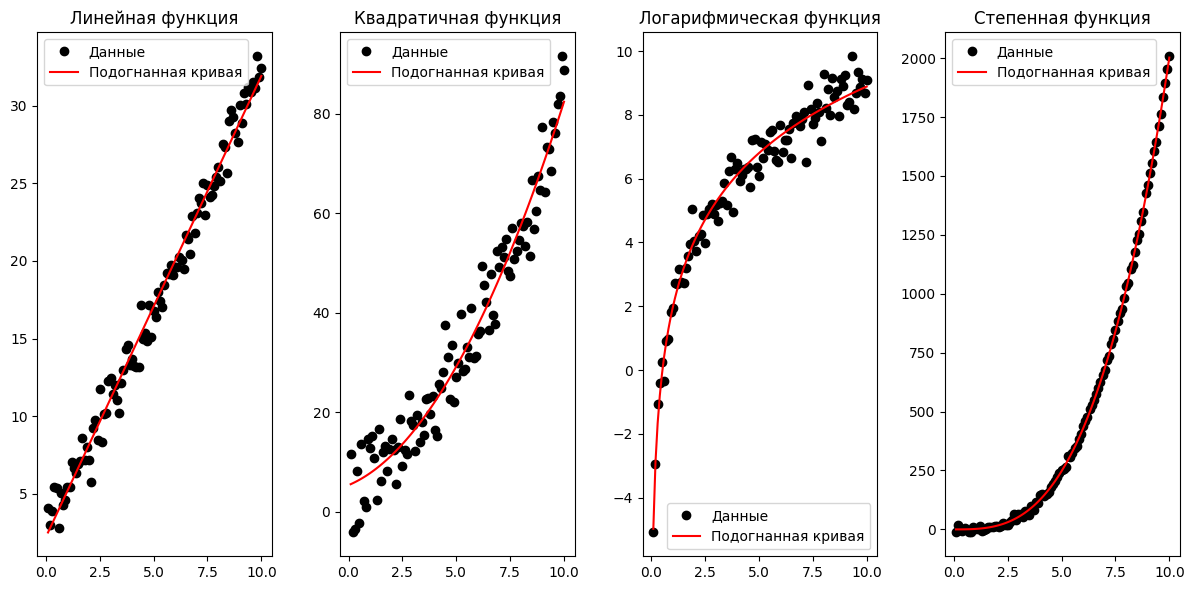

In [37]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.plot(x, y1_noisy, 'ko', label='Данные')
plt.plot(x, func1(x, *popt1), 'r-', label='Подогнанная кривая')
plt.legend()
plt.title('Линейная функция')

plt.subplot(1, 4, 2)
plt.plot(x, y2_noisy, 'ko', label='Данные')
plt.plot(x, func2(x, *popt2), 'r-', label='Подогнанная кривая')
plt.legend()
plt.title('Квадратичная функция')

plt.subplot(1, 4, 3)
plt.plot(x, y3_noisy, 'ko', label='Данные')
plt.plot(x, func3(x, *popt3), 'r-', label='Подогнанная кривая')
plt.legend()
plt.title('Логарифмическая функция')

plt.subplot(1, 4, 4)
plt.plot(x, y4_noisy, 'ko', label='Данные')
plt.plot(x, func4(x, *popt4), 'r-', label='Подогнанная кривая')
plt.legend()
plt.title('Степенная функция')

plt.tight_layout()
plt.show()

In [38]:
def lin_dev(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def quad_dev(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

y1_pred = func1(x, *popt1)
y2_pred = func2(x, *popt2)
y3_pred = func3(x, *popt3)
y4_pred = func4(x, *popt4)

lin_dev1 = lin_dev(y1_noisy, y1_pred)
lin_dev2 = lin_dev(y2_noisy, y2_pred)
lin_dev3 = lin_dev(y3_noisy, y3_pred)
lin_dev4 = lin_dev(y4_noisy, y4_pred)

quad_dev1 = quad_dev(y1_noisy, y1_pred)
quad_dev2 = quad_dev(y2_noisy, y2_pred)
quad_dev3 = quad_dev(y3_noisy, y3_pred)
quad_dev4 = quad_dev(y4_noisy, y4_pred)

In [39]:

print("Линейная функция:")
print(f"Линейное отклонение: {lin_dev1:.2f}")
print(f"Квадратичное отклонение: {quad_dev1:.2f}")

print("\nКвадратичная функция:")
print(f"Линейное отклонение: {lin_dev2:.2f}")
print(f"Квадратичное отклонение: {quad_dev2:.2f}")

print("\nЛогарифмическая функция:")
print(f"Линейное отклонение: {lin_dev3:.2f}")
print(f"Квадратичное отклонение: {quad_dev3:.2f}")

print("\nСтепенная функция:")
print(f"Линейное отклонение: {lin_dev4:.2f}")
print(f"Квадратичное отклонение: {quad_dev4:.2f}")

Линейная функция:
Линейное отклонение: 0.81
Квадратичное отклонение: 1.00

Квадратичная функция:
Линейное отклонение: 4.28
Квадратичное отклонение: 5.06

Логарифмическая функция:
Линейное отклонение: 0.37
Квадратичное отклонение: 0.48

Степенная функция:
Линейное отклонение: 7.50
Квадратичное отклонение: 9.28


### 1.2

#### 1.2.1

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Предсказанные значения и настоящие значения:
Предсказанное: 40692.00, Настоящее: 37731.0
Предсказанное: 122933.04, Настоящее: 122391.0
Предсказанное: 64990.49, Настоящее: 57081.0
Предсказанное: 63121.37, Настоящее: 63218.0
Предсказанное: 115456.58, Настоящее: 116969.0


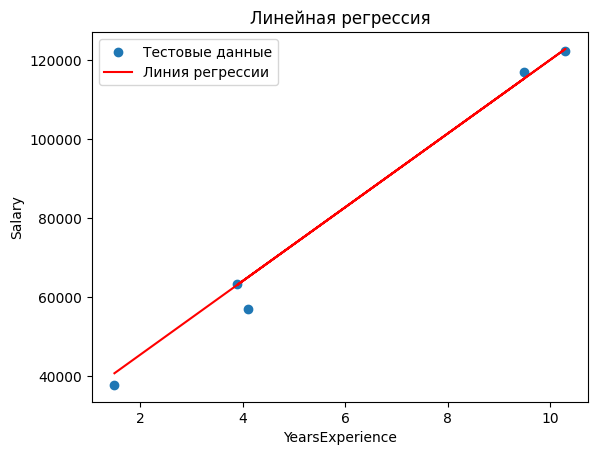

In [52]:
data = pd.read_csv('data.csv')

X = data[['YearsExperience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Предсказанные значения и настоящие значения:')
for i in range(len(y_test)):
    print(f'Предсказанное: {y_pred[i]:.2f}, Настоящее: {y_test.iloc[i]}')

plt.scatter(X_test, y_test, label='Тестовые данные')
plt.plot(X_test, y_pred, label='Линия регрессии', color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

In [53]:
print('Точность модели:', model.score(X_test, y_test))

Точность модели: 0.9871579236808793


### 1.3

#### 1.3.2

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('wine_data.csv')

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R2: {r2:.2f}')

MSE: 0.39, R2: 0.41


### *

Полином первой степени: y = -0.43x + 4.24
Полином второй степени: y = -0.45x^2 + 1.80x + 1.50


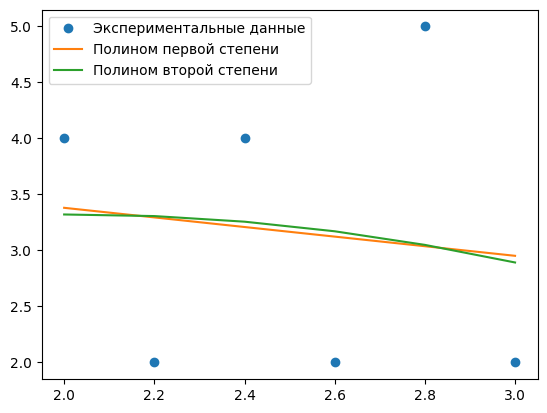

In [64]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2.0, 2.2, 2.4, 2.6, 2.8, 3.0])
y = np.array([4.0, 2.0, 4.0, 2.0, 5.0, 2.0])

A1 = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A1, y, rcond=None)[0]

A2 = np.vstack([x**2, x, np.ones(len(x))]).T
a2, b2, c2 = np.linalg.lstsq(A2, y, rcond=None)[0]

print("Полином первой степени: y = {:.2f}x + {:.2f}".format(a1, b1))
print("Полином второй степени: y = {:.2f}x^2 + {:.2f}x + {:.2f}".format(a2, b2, c2))

plt.plot(x, y, 'o', label='Экспериментальные данные')
plt.plot(x, a1*x + b1, label='Полином первой степени')
plt.plot(x, a2*x**2 + b2*x + c2, label='Полином второй степени')
plt.legend()
plt.show()